### **Code** : **PV Smart-Metering Regression Analysis_Detail_2**
- Writer : Donghyeon Kim
- Date : 2022.08.03
- Data : 태양광 사용가구 '김OO' 2021/4
- (1) GHI < 260 / (2) GHI >= 260

<hr>

### **0. Running the library and setting up the foundation**

In [1]:
# 1. 라이브러리 실행
from pathlib import Path
import os
import pandas as pd
import numpy as np 
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# 2. 파일의 상위-상위 경로 설정
os_root = Path(os.path.join(os.getcwd(), '8. reg_analysis_detail_2.ipynb'))
root = os_root.parent.parent

#### **User Data**

In [3]:
# 3. 사용자 데이터 호출
# User data 폴더
user_folder_root = os.path.join(root, 'data_revised_hour')

# 사용자 이름
folder_root = os.path.join(root, 'data')
user_name = os.listdir(folder_root)

# FIXME
user = '김OO'

# 사용자 이름 index
idx = user_name.index(user)

# xlsx 파일 이름
xlsx_name = user_folder_root + '\\' + f'{user_name[idx]}_dataset_revised_hour.xlsx'

# 데이터 호출
df_user = pd.read_excel(xlsx_name)

In [4]:
df_user.head(24)

,date,year,month,day,hour,그리드 소비(kWh),수출 된 에너지(kWh),에너지 수율(kWh)
0,2021-03-01 00:59:00,2021,3,1,0,0.200001,0.000000,0.000000
1,2021-03-01 01:59:00,2021,3,1,1,0.250000,0.000000,0.000000
2,2021-03-01 02:59:00,2021,3,1,2,0.210003,0.000000,0.000000
3,2021-03-01 03:59:00,2021,3,1,3,0.180000,0.000000,0.000000
4,2021-03-01 04:59:00,2021,3,1,4,0.190002,0.000000,0.000000
5,2021-03-01 05:59:00,2021,3,1,5,0.200001,0.000000,0.000000
6,2021-03-01 06:59:00,2021,3,1,6,0.299999,0.000000,0.000000
7,2021-03-01 07:59:00,2021,3,1,7,0.270000,0.000000,0.000000
8,2021-03-01 08:59:00,2021,3,1,8,0.399998,0.000000,0.000000
9,2021-03-01 09:59:00,2021,3,1,9,0.219997,0.000000,0.050003


In [5]:
# Merge를 위한 column filtering
df_user_filter = df_user.drop(['date'], axis = 1)

In [6]:
df_user_filter.head(24)

,year,month,day,hour,그리드 소비(kWh),수출 된 에너지(kWh),에너지 수율(kWh)
0,2021,3,1,0,0.200001,0.000000,0.000000
1,2021,3,1,1,0.250000,0.000000,0.000000
2,2021,3,1,2,0.210003,0.000000,0.000000
3,2021,3,1,3,0.180000,0.000000,0.000000
4,2021,3,1,4,0.190002,0.000000,0.000000
5,2021,3,1,5,0.200001,0.000000,0.000000
6,2021,3,1,6,0.299999,0.000000,0.000000
7,2021,3,1,7,0.270000,0.000000,0.000000
8,2021,3,1,8,0.399998,0.000000,0.000000
9,2021,3,1,9,0.219997,0.000000,0.050003


<hr>

### **1. Data Pre-processing for Regression Analysis**

#### **<Data 1 : Weather Data>**

#### **Data Pre-processing**

In [7]:
# weather data 폴더
weather_folder_root = os.path.join(root, 'data_weather')

# csv 파일 이름
csv_name = weather_folder_root + '\\' + 'keei_ldaps.csv'

# 데이터 호출
df_weather = pd.read_csv(csv_name, encoding='cp949')

In [8]:
# 데이터 정제
df_weather['dt'] = pd.to_datetime(df_weather['dt'], format='%Y/%m/%d %H:%M:%S')
df_weather['year'] = df_weather['dt'].dt.year
df_weather['month'] = df_weather['dt'].dt.month
df_weather['day'] = df_weather['dt'].dt.day
df_weather['hour'] = df_weather['dt'].dt.hour

In [9]:
# 태양광 사용 가구 : '김OO'
df_weather_use = df_weather[df_weather.owner == '김OO']

In [10]:
# Data Merge
df_weather_use = pd.merge(df_weather_use, df_user_filter, how='left', on=['year', 'month', 'day', 'hour'])

In [11]:
# Column 이름 변경
df_weather_use.rename(columns={'그리드 소비(kWh)': 'grid_kWh', '수출 된 에너지(kWh)': 'export_kWh', '에너지 수율(kWh)': 'yield_kWh'}, inplace=True)

In [12]:
df_weather_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).tail(10)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,place,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
13840,2022-04-30 15:00:00+09:00,289.807922,1.103254,2.136642,243.770538,0.0,75.599068,0.006213,서울,2022,4,30,15,0.000000,0.370117,0.680176
13841,2022-04-30 16:00:00+09:00,290.679688,3.716064,0.633899,284.969421,0.0,70.625931,0.006306,서울,2022,4,30,16,0.000000,0.319824,0.470215
13842,2022-04-30 17:00:00+09:00,289.007690,3.104170,1.623195,331.664551,0.0,78.621765,0.005859,서울,2022,4,30,17,0.020020,0.130127,0.370117
13843,2022-04-30 18:00:00+09:00,287.392883,2.541556,1.322166,187.572693,0.0,80.893768,0.005859,서울,2022,4,30,18,0.100098,0.070068,0.180176
13844,2022-04-30 19:00:00+09:00,285.536194,1.803355,2.358898,50.007076,0.0,84.606339,0.005744,서울,2022,4,30,19,0.709961,0.000000,0.000000
13845,2022-04-30 20:00:00+09:00,284.207703,1.945932,1.498594,1.366211,0.0,87.228836,0.005584,서울,2022,4,30,20,0.290039,0.000000,0.000000
13846,2022-04-30 21:00:00+09:00,282.821838,0.995493,1.326086,0.000000,0.0,85.965973,0.005168,서울,2022,4,30,21,0.320068,0.000000,0.000000
13847,2022-04-30 22:00:00+09:00,281.902527,0.671311,1.957892,0.000000,0.0,83.123375,0.005127,서울,2022,4,30,22,0.260010,0.000000,0.000000
13848,2022-04-30 23:00:00+09:00,281.104187,0.343318,2.047524,0.000000,0.0,80.482849,0.004883,서울,2022,4,30,23,0.209961,0.000000,0.000000
13849,2022-05-01 00:00:00+09:00,280.501892,0.750398,1.590288,0.000000,0.0,77.866310,0.004686,서울,2022,5,1,0,NaN,NaN,NaN


In [13]:
# 데이터에 해당하는 연도 / 21년도에 해당하는 월 / 22년도에 해당하는 월
# 데이터 기간 : 2021.03 ~ 2022.04
d_year = [2021, 2022]
d_month_21 = range(3, 12+1)
d_month_22 = range(1, 4+1)

In [14]:
# 2021.03 ~ 2022.04 기간에 해당하는 데이터만 필터링
for y in d_year:
    count = 0
    if y == 2021:
        for ma in d_month_21:
            temp = df_weather_use[(df_weather_use.year == y) & (df_weather_use.month == ma)]
            if count == 0:
                result = temp
                count += 1
            else:
                result = pd.concat([result, temp])
    elif y == 2022:
        for mb in d_month_22:
            temp = df_weather_use[(df_weather_use.year == y) & (df_weather_use.month == mb)]
            result = pd.concat([result, temp])

df_weather_use = result

In [15]:
# 온도(temperature) 변환
# 기존 형태 : Kelvin(켈빈 온도) -> 변경하고자 하는 형태 : 섭씨 온도
# 섭씨 온도와 켈빈 온도 관계식 : 0(C) + 273.15(K) = 273.15(K)

df_weather_use.temperature = df_weather_use.temperature - 273.15

In [16]:
df_weather_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).head(24)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,place,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
3625,2021-03-01 00:00:00+09:00,10.322687,0.858208,0.041718,0.000000,0.000000,60.644928,0.004421,서울,2021,3,1,0,0.200001,0.000000,0.000000
3626,2021-03-01 01:00:00+09:00,10.029108,0.135828,-1.085083,0.000000,0.000000,56.432068,0.004188,서울,2021,3,1,1,0.250000,0.000000,0.000000
3627,2021-03-01 02:00:00+09:00,9.844873,0.362611,-0.180941,0.000000,0.000000,62.081512,0.004626,서울,2021,3,1,2,0.210003,0.000000,0.000000
3628,2021-03-01 03:00:00+09:00,9.587915,-0.411156,0.997797,0.000000,0.000000,56.335152,0.004261,서울,2021,3,1,3,0.180000,0.000000,0.000000
3629,2021-03-01 04:00:00+09:00,9.564752,-0.462263,-0.222837,0.000000,0.000000,61.451012,0.004599,서울,2021,3,1,4,0.190002,0.000000,0.000000
3630,2021-03-01 05:00:00+09:00,9.363092,0.721948,-2.010242,0.000000,0.000000,64.313083,0.004559,서울,2021,3,1,5,0.200001,0.000000,0.000000
3631,2021-03-01 06:00:00+09:00,8.639551,-1.163785,-1.346743,0.000000,2.439514,92.884331,0.005859,서울,2021,3,1,6,0.299999,0.000000,0.000000
3632,2021-03-01 07:00:00+09:00,8.481317,-0.673493,-1.971651,0.000000,1.226685,94.962051,0.006039,서울,2021,3,1,7,0.270000,0.000000,0.000000
3633,2021-03-01 08:00:00+09:00,8.494592,-1.207814,-0.468723,3.883789,1.170898,93.874001,0.005951,서울,2021,3,1,8,0.399998,0.000000,0.000000
3634,2021-03-01 09:00:00+09:00,8.613031,-5.542665,1.533955,18.028790,0.239624,88.038452,0.005981,서울,2021,3,1,9,0.219997,0.000000,0.050003


<hr>

#### **<Data 2 : Visibility Data>**

#### **Data Pre-processing**

In [17]:
# ASOS data 폴더
asos_folder_root = os.path.join(root, 'data_ASOS')

# csv 파일 이름
csv_file_name = ['OBS_ASOS_TIM_1.csv', 'OBS_ASOS_TIM_2.csv']

# 데이터 호출
for i in range(len(csv_file_name)):
    csv_name = asos_folder_root + '\\' + csv_file_name[i]
    if i == 0:
        df_asos = pd.read_csv(csv_name, encoding='cp949')
    else:
        temp = pd.read_csv(csv_name, encoding='cp949')
        df_asos = pd.concat([df_asos, temp])

In [18]:
df_asos['일시'] = pd.to_datetime(df_asos['일시'], format='%Y/%m/%d %H:%M:%S')
df_asos['year'] = df_asos['일시'].dt.year
df_asos['month'] = df_asos['일시'].dt.month
df_asos['day'] = df_asos['일시'].dt.day
df_asos['hour'] = df_asos['일시'].dt.hour

In [19]:
df_asos.head(10)

,지점,지점명,일시,시정(10m),year,month,day,hour
0,90,속초,2021-03-01 00:00:00,2000,2021,3,1,0
1,90,속초,2021-03-01 01:00:00,2000,2021,3,1,1
2,90,속초,2021-03-01 02:00:00,2000,2021,3,1,2
3,90,속초,2021-03-01 03:00:00,1951,2021,3,1,3
4,90,속초,2021-03-01 04:00:00,1877,2021,3,1,4
5,90,속초,2021-03-01 05:00:00,1630,2021,3,1,5
6,90,속초,2021-03-01 06:00:00,713,2021,3,1,6
7,90,속초,2021-03-01 07:00:00,794,2021,3,1,7
8,90,속초,2021-03-01 08:00:00,716,2021,3,1,8
9,90,속초,2021-03-01 09:00:00,906,2021,3,1,9


In [20]:
# 지점명 체크
df_asos['지점명'].unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '제주', '고산',
       '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '정선군', '제천',
       '보은', '천안', '보령', '부여', '금산', '세종', '부안', '임실', '정읍', '남원', '장수',
       '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '장흥', '해남',
       '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주', '문경', '청송군', '영덕',
       '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해'],
      dtype=object)

In [21]:
# '김OO' 가구 위치는 '서울'이므로 해당 지역으로 필터링
df_asos_filter = df_asos[df_asos['지점명'] == '서울']

In [22]:
# Data Merge
df_asos_filter = pd.merge(df_asos_filter, df_user_filter, how='left', on=['year', 'month', 'day', 'hour'])

In [23]:
# Column 이름 변경
df_asos_filter.rename(columns={'그리드 소비(kWh)': 'grid_kWh', '수출 된 에너지(kWh)': 'export_kWh',
                               '에너지 수율(kWh)': 'yield_kWh', '시정(10m)': 'visibility', '지점명': 'place'}, inplace=True)

In [24]:
df_asos_filter = df_asos_filter.drop(['지점', '일시'], axis = 1)

In [25]:
df_asos_filter.head(24)

,place,visibility,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
0,서울,2000,2021,3,1,0,0.200001,0.000000,0.000000
1,서울,2000,2021,3,1,1,0.250000,0.000000,0.000000
2,서울,2000,2021,3,1,2,0.210003,0.000000,0.000000
3,서울,2000,2021,3,1,3,0.180000,0.000000,0.000000
4,서울,447,2021,3,1,4,0.190002,0.000000,0.000000
5,서울,1303,2021,3,1,5,0.200001,0.000000,0.000000
6,서울,587,2021,3,1,6,0.299999,0.000000,0.000000
7,서울,381,2021,3,1,7,0.270000,0.000000,0.000000
8,서울,381,2021,3,1,8,0.399998,0.000000,0.000000
9,서울,294,2021,3,1,9,0.219997,0.000000,0.050003


<hr>

### **2. Regression Analysis**

#### **1) Creating Data & Pre-processing**

In [26]:
# 회귀분석 진행을 위한 데이터 생성
reg_data = pd.merge(df_weather_use, df_asos_filter, how='left', on=['year', 'month', 'day', 'hour', 'place', 'grid_kWh', 'export_kWh', 'yield_kWh'])

In [27]:
reg_data = reg_data.drop(['owner', 'id_hh', 'id_hs'], axis = 1)

In [28]:
reg_data.loc[:, 'ym'] = reg_data.year.astype(str) + '/' + reg_data.month.astype(str)

In [29]:
reg_data.head(10)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,place,year,month,day,hour,grid_kWh,export_kWh,yield_kWh,visibility,ym
0,2021-03-01 00:00:00+09:00,10.322687,0.858208,0.041718,0.000000,0.000000,60.644928,0.004421,서울,2021,3,1,0,0.200001,0.0,0.000000,2000,2021/3
1,2021-03-01 01:00:00+09:00,10.029108,0.135828,-1.085083,0.000000,0.000000,56.432068,0.004188,서울,2021,3,1,1,0.250000,0.0,0.000000,2000,2021/3
2,2021-03-01 02:00:00+09:00,9.844873,0.362611,-0.180941,0.000000,0.000000,62.081512,0.004626,서울,2021,3,1,2,0.210003,0.0,0.000000,2000,2021/3
3,2021-03-01 03:00:00+09:00,9.587915,-0.411156,0.997797,0.000000,0.000000,56.335152,0.004261,서울,2021,3,1,3,0.180000,0.0,0.000000,2000,2021/3
4,2021-03-01 04:00:00+09:00,9.564752,-0.462263,-0.222837,0.000000,0.000000,61.451012,0.004599,서울,2021,3,1,4,0.190002,0.0,0.000000,447,2021/3
5,2021-03-01 05:00:00+09:00,9.363092,0.721948,-2.010242,0.000000,0.000000,64.313083,0.004559,서울,2021,3,1,5,0.200001,0.0,0.000000,1303,2021/3
6,2021-03-01 06:00:00+09:00,8.639551,-1.163785,-1.346743,0.000000,2.439514,92.884331,0.005859,서울,2021,3,1,6,0.299999,0.0,0.000000,587,2021/3
7,2021-03-01 07:00:00+09:00,8.481317,-0.673493,-1.971651,0.000000,1.226685,94.962051,0.006039,서울,2021,3,1,7,0.270000,0.0,0.000000,381,2021/3
8,2021-03-01 08:00:00+09:00,8.494592,-1.207814,-0.468723,3.883789,1.170898,93.874001,0.005951,서울,2021,3,1,8,0.399998,0.0,0.000000,381,2021/3
9,2021-03-01 09:00:00+09:00,8.613031,-5.542665,1.533955,18.028790,0.239624,88.038452,0.005981,서울,2021,3,1,9,0.219997,0.0,0.050003,294,2021/3


#### **2) Checking the correlation between variables**

In [30]:
# 시각화를 위한 필요한 변수만 남기고, 나머지 변수는 제거하기

# 제거한 변수 #
# dt : 날짜
# year : 연도
# month : 월
# day : 일
# hour : 시간
# place : 시정 측정한 위치

# uws_10m : x축 풍속
# vws_10m : y축 풍속
# precipitation : 강수량
# relative_humidity_1p5m : 상대습도
# specific_humidity_1p5m : 절대습도
# grid_kWh : 그리드 소비(kWh)
# export_kWh : 수출 된 에너지(kWh)
# yield_kWh : 에너지 수율(kWh)

reg_data_vis = reg_data.drop(['dt', 'year', 'month', 'day', 'hour', 'place',
                              'uws_10m', 'vws_10m', 'precipitation', 'relative_humidity_1p5m', 'specific_humidity_1p5m',
                              'grid_kWh', 'export_kWh', 'yield_kWh'], axis=1)

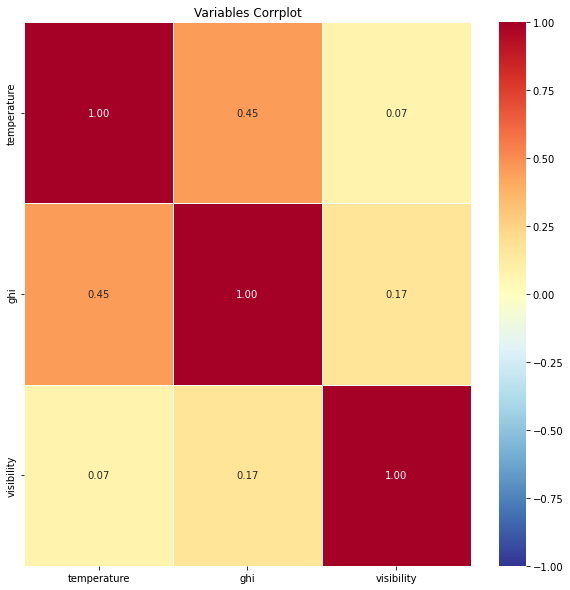

In [31]:
# Heatmap Options
# annot=True : 실제 값 표시하기
# linewidths : 경계면 실선으로 구분하기
# cmap : 컬러 설정하기
# vmin, vmax : 컬러바 범위 설정하기
plt.figure(figsize=(10, 10))
sns.heatmap(data=reg_data_vis.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='RdYlBu_r', vmin=-1, vmax=1)
plt.title("Variables Corrplot")
plt.show()

#### Further Data Filtering

In [32]:
# year/month : 2021/4
reg_data_f = reg_data[reg_data.ym == '2021/4']

In [33]:
# GHI < 260 data
reg_data_f1 = reg_data_f[reg_data_f.ghi < 260]

In [34]:
# GHI >= 260 data
reg_data_f2 = reg_data_f[reg_data_f.ghi >= 260]

In [35]:
reg_data_f1

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,place,year,month,day,hour,grid_kWh,export_kWh,yield_kWh,visibility,ym
744,2021-04-01 00:00:00+09:00,10.800043,-0.151105,-1.939610,0.000000,0.0,60.266808,0.005153,서울,2021,4,1,0,0.160004,0.0,0.0,2000,2021/4
745,2021-04-01 01:00:00+09:00,10.107233,-0.090850,-1.459168,0.000000,0.0,61.385361,0.005218,서울,2021,4,1,1,0.169998,0.0,0.0,2000,2021/4
746,2021-04-01 02:00:00+09:00,9.465143,0.896544,-0.909341,0.000000,0.0,65.537230,0.005373,서울,2021,4,1,2,0.199997,0.0,0.0,2000,2021/4
747,2021-04-01 03:00:00+09:00,8.774255,0.571677,-0.558573,0.000000,0.0,71.383453,0.005440,서울,2021,4,1,3,0.160004,0.0,0.0,2000,2021/4
748,2021-04-01 04:00:00+09:00,8.181665,0.865415,0.454901,0.000000,0.0,70.083511,0.005340,서울,2021,4,1,4,0.169998,0.0,0.0,2000,2021/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2021-04-30 19:00:00+09:00,14.423822,2.599458,-1.666439,49.121342,0.0,61.991585,0.005901,서울,2021,4,30,19,0.319977,0.0,0.0,821,2021/4
1460,2021-04-30 20:00:00+09:00,13.195612,2.541007,-1.595243,0.635254,0.0,67.742912,0.006088,서울,2021,4,30,20,0.260010,0.0,0.0,780,2021/4
1461,2021-04-30 21:00:00+09:00,12.341058,1.668987,-1.839267,0.000000,0.0,71.175964,0.006232,서울,2021,4,30,21,0.329987,0.0,0.0,901,2021/4
1462,2021-04-30 22:00:00+09:00,11.647394,1.422453,-1.807745,0.000000,0.0,75.501770,0.006317,서울,2021,4,30,22,0.399994,0.0,0.0,1947,2021/4


<hr>

#### **Case 3 : 에너지 수율(kWh)**
- 참고 : Case 1(그리드 소비(kWh)), Case 2(수출 된 에너지(kWh))는 생략.

#### **GHI < 260 data : Weighted Regression Analysis**

#### Package 1 : Scikit-learn

#### (1) Training & Test Set Split from data other than NA

In [36]:
x = reg_data_f1.dropna(axis=0)[['temperature', 'ghi', 'visibility', 'uws_10m', 'vws_10m',
                                'relative_humidity_1p5m', 'precipitation']]
y = reg_data_f1.dropna(axis=0)[['yield_kWh']]

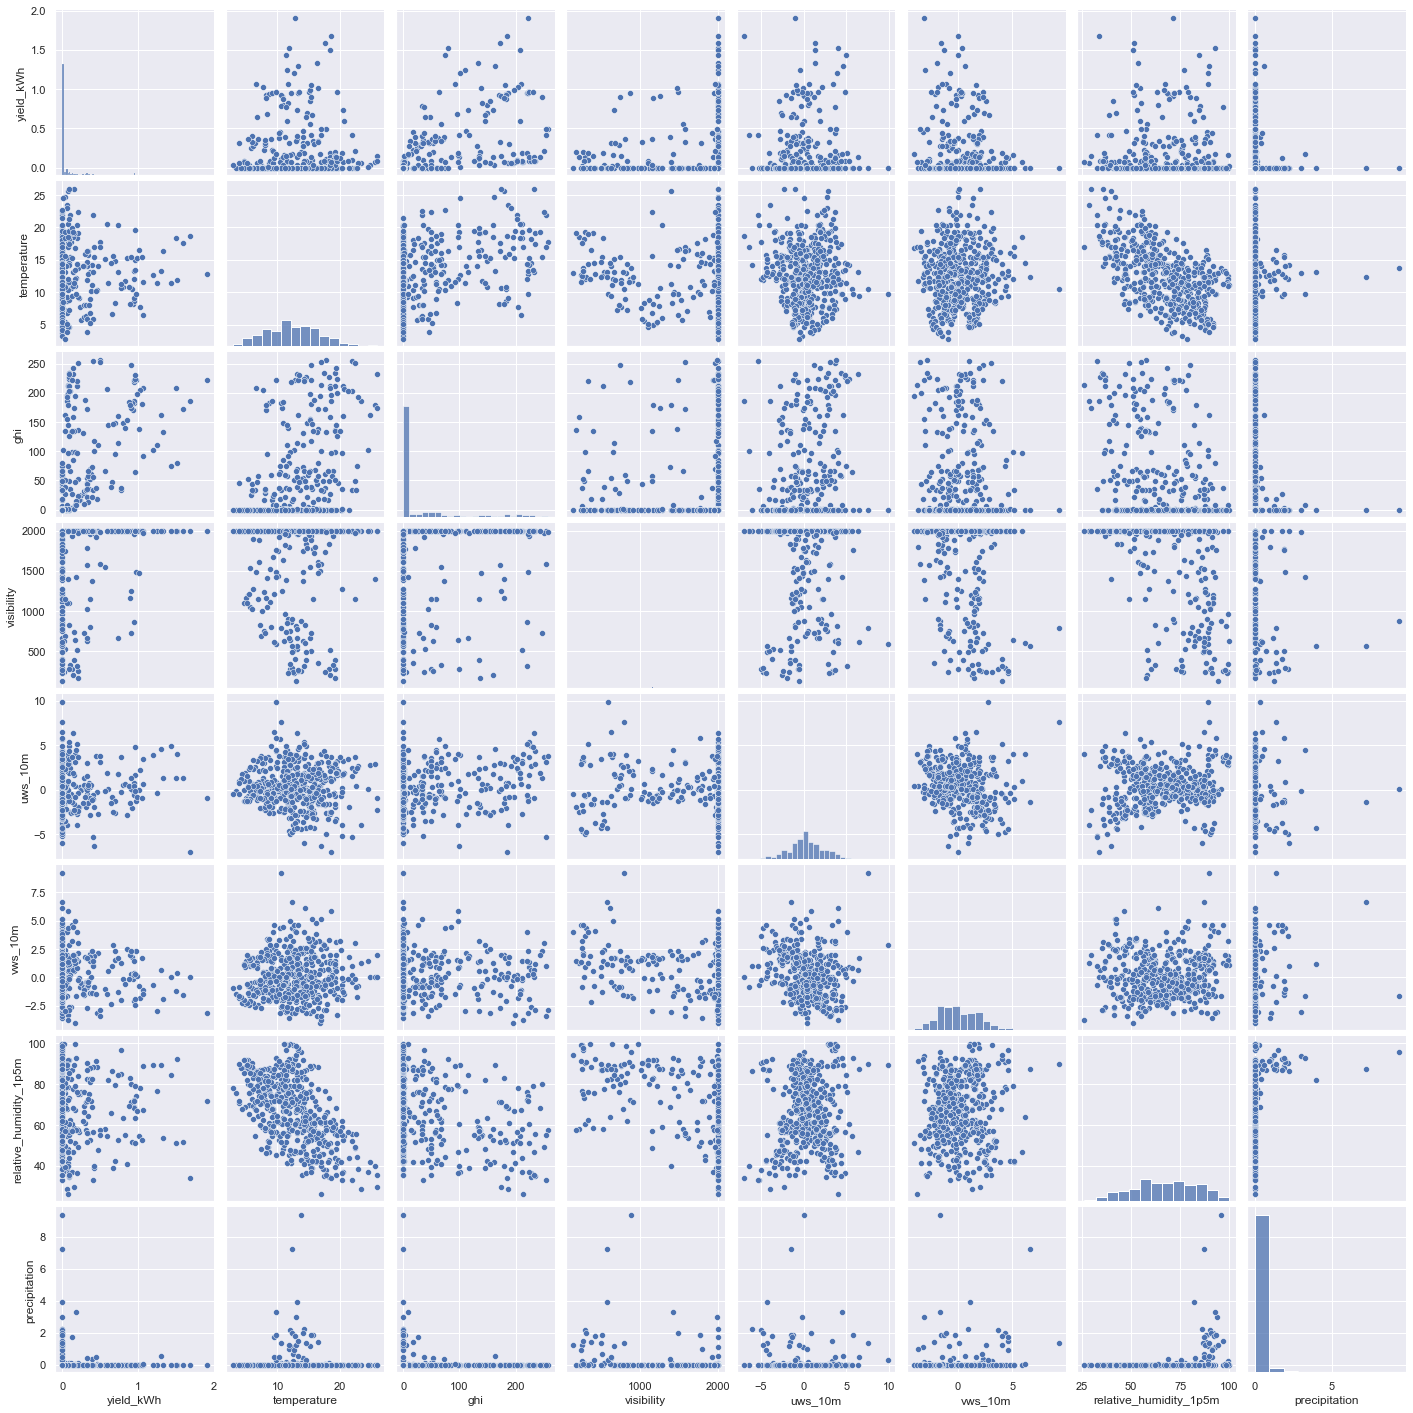

In [37]:
# Matrix Scatter Plot
sns.set(rc={'figure.figsize':(12, 12)})
xydata = reg_data_f1.dropna(axis=0)[['yield_kWh', 'temperature', 'ghi', 'visibility', 'uws_10m', 'vws_10m',
                                     'relative_humidity_1p5m', 'precipitation']]
sns.pairplot(xydata, diag_kind='hist')
plt.show()

#### (2) Modeling

In [38]:
# Initialization
lin_reg = linear_model.LinearRegression(fit_intercept=True)

In [39]:
# Fitting
lin_reg_model = lin_reg.fit(x, y)

In [40]:
# Predicting(Estimated values)
y_predict = lin_reg_model.predict(x)

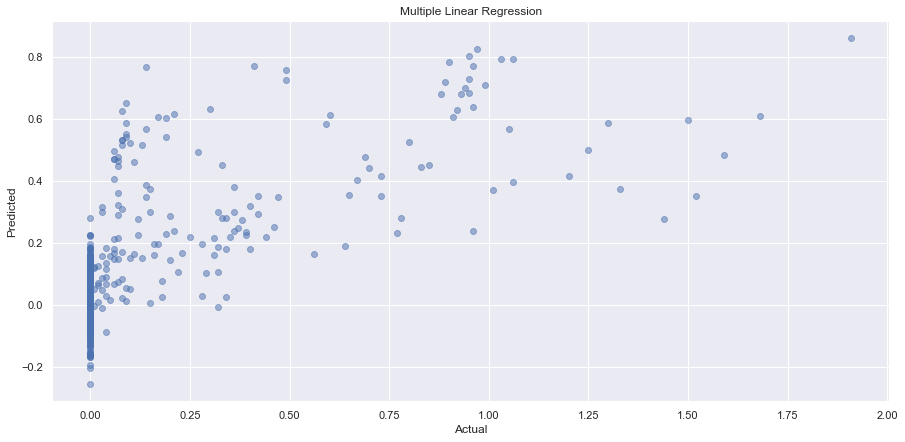

In [41]:
# Visualization confirmation
sns.set(rc={'figure.figsize':(15, 7)})
plt.scatter(y, y_predict, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

#### (3) Checking coefficients and constants

In [42]:
print(lin_reg_model.coef_)

[[-7.51100341e-03  3.45783183e-03  8.36801875e-05 -2.33941223e-02
  -6.90944172e-03  5.37563680e-03 -1.49593097e-02]]


#### (4) Accuracy Test

In [43]:
# R-Squared
print(lin_reg_model.score(x, y))

0.4869618168944789


#### Package 2 : Statsmodels

#### (1) Checking fitting results
- F-statistic : 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악
- P-value : 각 변수가 종속변수에 미치는 영향이 유의한지 파악
- Adjusted R-square : 회귀직선이 종속변수의 몇 %를 설명할 수 있는지 확인

In [44]:
x_train_const = sm.add_constant(x)
model = sm.OLS(y, x_train_const)
results = model.fit()

In [45]:
# 결과값 요약 확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              yield_kWh   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     66.98
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.25e-67
Time:                        23:27:12   Log-Likelihood:                 57.555
No. Observations:                 502   AIC:                            -99.11
Df Residuals:                     494   BIC:                            -65.36
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.4032      0.113     -3.568      0.000      -0.625      -0.181
temperature               -0.0075      0.003     -2.517      0.012      -0.013      -0.002
ghi                        0.0035      0.000     21.259      0.000       0.003       0.004
visibility              8.368e-05   2.45e-05      3.409      0.001    3.55e-05       0.000
uws_10m                   -0.0234      0.005     -4.972      0.000      -0.033      -0.014
vws_10m                   -0.0069      0.005     -1.270      0.205      -0.018       0.004
relative_humidity_1p5m     0.0054      0.001      5.987      0.000       0.004       0.007
precipitation             -0.0150      0.016     -0.937      0.349      -0.046       0.016
==============================================================================
Omnibus:                      232.637   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1767.414
Skew:                           1.860   Prob(JB):                         0.00
Kurtosis:                      11.406   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# VIF(분산 팽창 인수)
for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)
    print(f'Variable: {model.exog_names[i]}, VIF: {vif.round(2)}')

Variable: temperature, VIF: 1.81
Variable: ghi, VIF: 1.3
Variable: visibility, VIF: 1.52
Variable: uws_10m, VIF: 1.13
Variable: vws_10m, VIF: 1.13
Variable: relative_humidity_1p5m, VIF: 2.19
Variable: precipitation, VIF: 1.18


#### (2) Checking residuals
- 회귀모형에 대한 가정(정규성, 등분산성, 독립성)을 충족하는지에 대한 검정
- 이상치가 개입하는지에 대한 검정을 하는 절차

##### (2-1) Linearity of the model
- 예측값(y_predict)과 잔차(residuals)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선).
- 빨간 실선은 잔차의 추세를 나타냄.
- 빨간 실선이 점선을 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


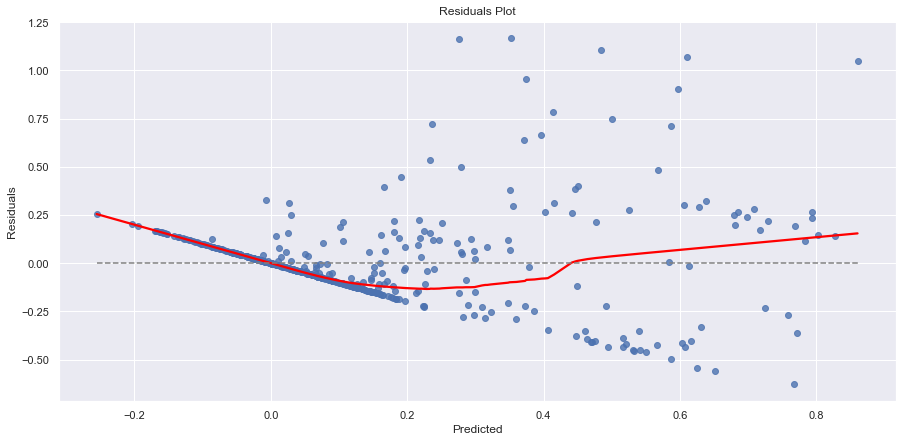

In [47]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(y_predict, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##### (2-2) Actual and Residuals Plot

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


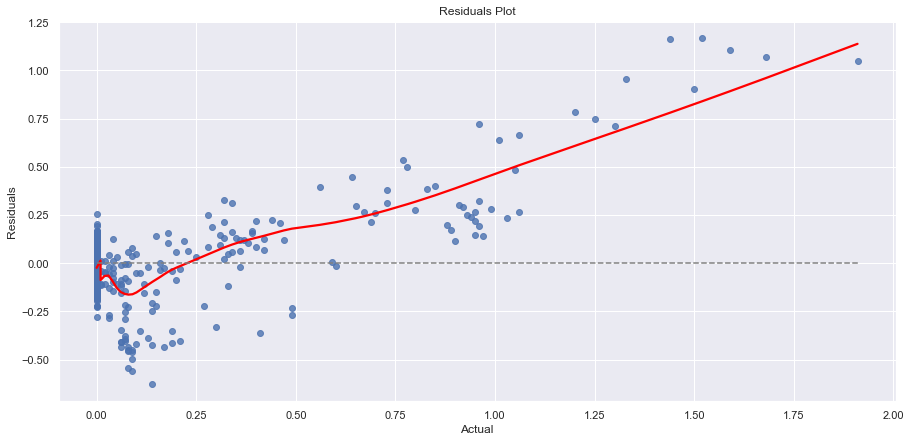

In [48]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(y, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([y.min(), y.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.show()

##### (2-3) Independent variables and Residuals Plot

##### (2-3-1) GHI and Residuals

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


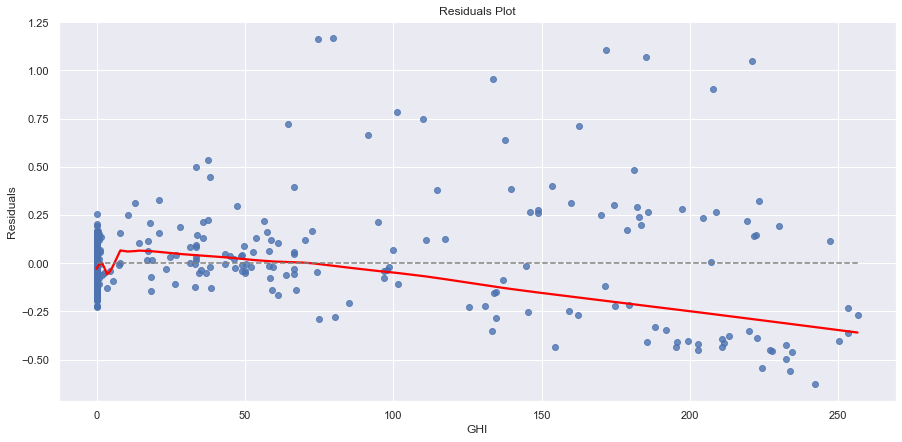

In [49]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(x.ghi, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([x.ghi.min(), x.ghi.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("GHI")
plt.ylabel("Residuals")
plt.show()

##### (2-3-2) Visibility and Residuals Plot

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


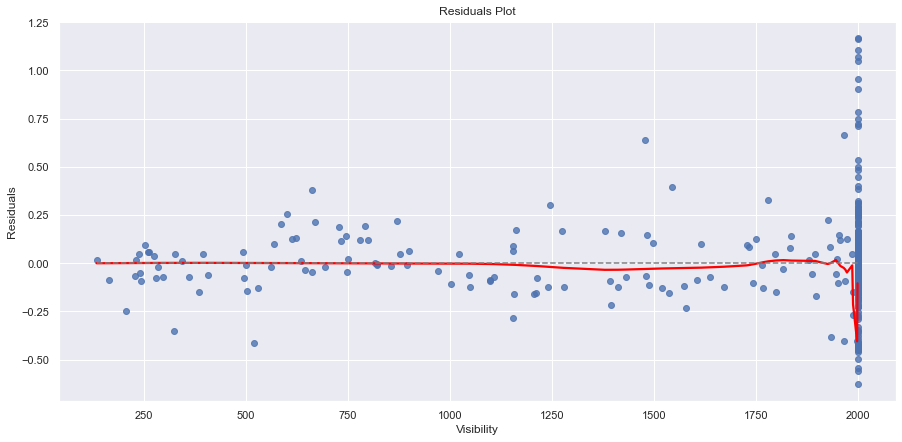

In [50]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(x.visibility, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([x.visibility.min(), x.visibility.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Visibility")
plt.ylabel("Residuals")
plt.show()

##### (2-3-3) Temperature and Residuals Plot

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


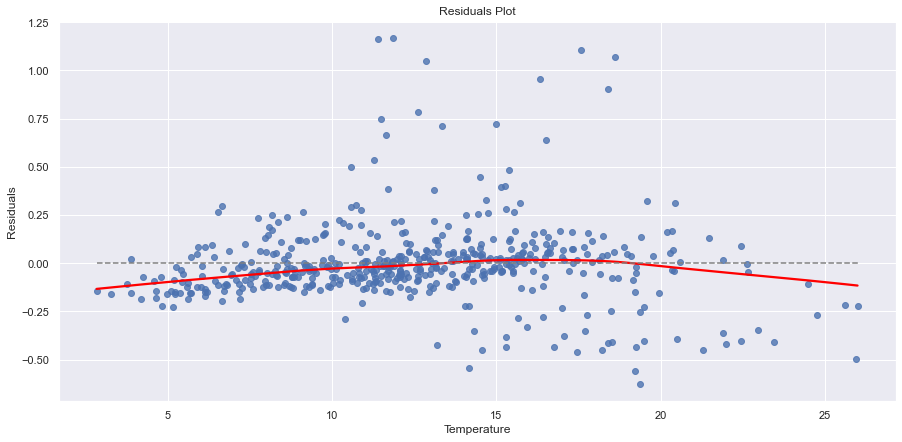

In [51]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(x.temperature, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([x.temperature.min(), x.temperature.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Temperature")
plt.ylabel("Residuals")
plt.show()

##### (2-4) Normality of residuals
- 잔차가 정규분포를 따른다는 가정
- Shapiro Test를 통해 확인할 수 있음.

In [52]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.8255805969238281, pvalue=5.695612338841707e-23)

##### (2-5) Equivariance of residuals
- 회귀모형을 통해 예측된 값이 크던 작던, 모든 값을에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌.
- 빨간색 실선이 수평선을 그리는 것이 이상적임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


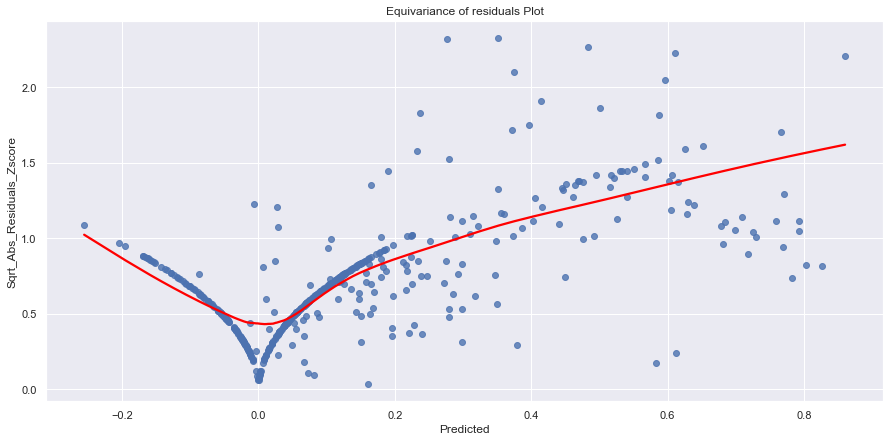

In [53]:
sr = scipy.stats.zscore(residuals)
sns.regplot(y_predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Equivariance of residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Sqrt_Abs_Residuals_Zscore")
plt.show()

<hr>

#### **GHI >= 260 data : Linear Regression Analysis**

#### Package 1 : Scikit-learn

#### (1) Training & Test Set Split from data other than NA

In [54]:
x = reg_data_f2.dropna(axis=0)[['temperature', 'ghi', 'visibility', 'uws_10m', 'vws_10m',
                                'relative_humidity_1p5m']]
y = reg_data_f2.dropna(axis=0)[['yield_kWh']]

# x.visibility = np.log(x.visibility)

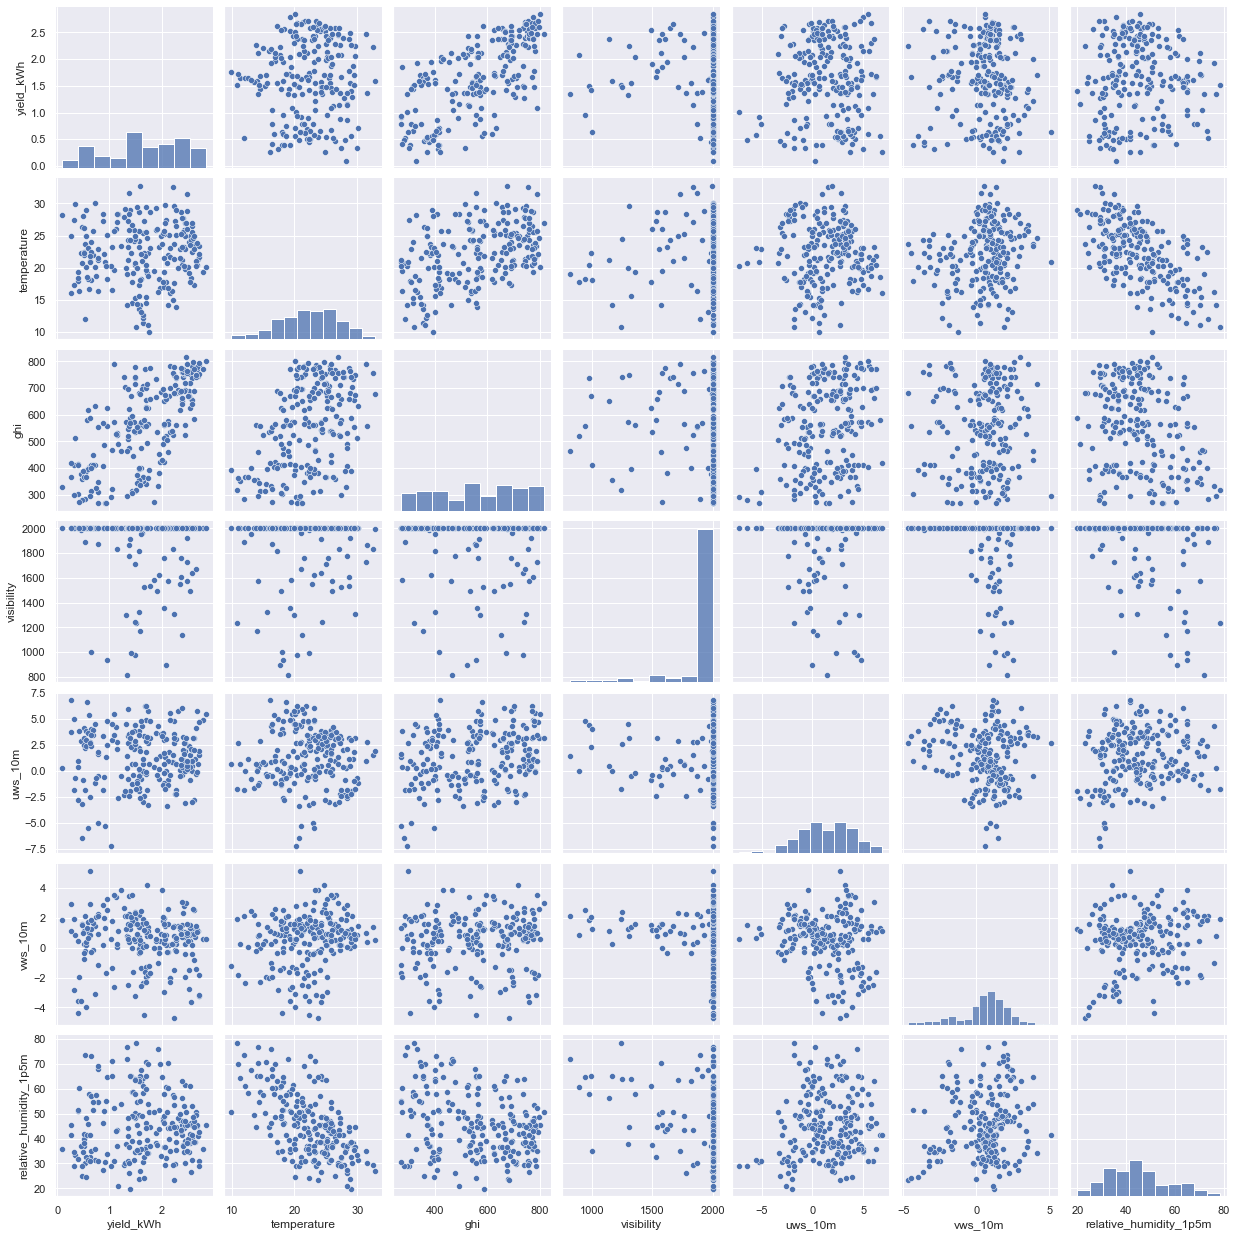

In [56]:
# Matrix Scatter Plot
sns.set(rc={'figure.figsize':(12, 12)})
xydata = reg_data_f2.dropna(axis=0)[['yield_kWh', 'temperature', 'ghi', 'visibility', 'uws_10m', 'vws_10m',
                                     'relative_humidity_1p5m']]
sns.pairplot(xydata, diag_kind='hist')
plt.show()

#### (2) Modeling

In [57]:
# Initialization
lin_reg = linear_model.LinearRegression(fit_intercept=True)

In [58]:
# Fitting
lin_reg_model = lin_reg.fit(x, y)

In [59]:
# Predicting(Estimated values)
y_predict = lin_reg_model.predict(x)

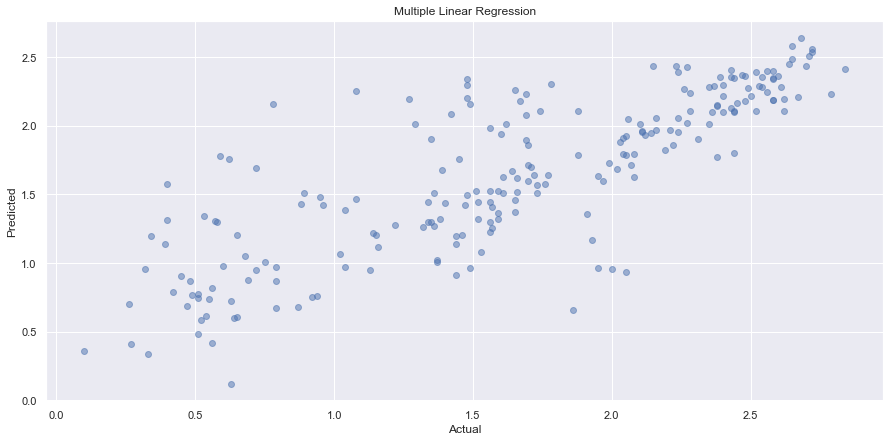

In [60]:
# Visualization confirmation
sns.set(rc={'figure.figsize':(15, 7)})
plt.scatter(y, y_predict, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

#### (3) Checking coefficients and constants

In [61]:
print(lin_reg_model.coef_)

[[-0.03084318  0.0042598   0.00014591 -0.08315148 -0.06619811  0.01424073]]


#### (4) Accuracy Test

In [62]:
# R-Squared
print(lin_reg_model.score(x, y))

0.6631875172649946


#### Package 2 : Statsmodels

#### (1) Checking fitting results
- F-statistic : 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악
- P-value : 각 변수가 종속변수에 미치는 영향이 유의한지 파악
- Adjusted R-square : 회귀직선이 종속변수의 몇 %를 설명할 수 있는지 확인

In [63]:
x_train_const = sm.add_constant(x)
model = sm.OLS(y, x_train_const)
results = model.fit()

In [64]:
# 결과값 요약 확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              yield_kWh   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     69.24
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           3.50e-47
Time:                        23:28:22   Log-Likelihood:                -116.74
No. Observations:                 218   AIC:                             247.5
Df Residuals:                     211   BIC:                             271.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.8240      0.421     -1.957      0.052      -1.654       0.006
temperature               -0.0308      0.009     -3.537      0.000      -0.048      -0.014
ghi                        0.0043      0.000     20.084      0.000       0.004       0.005
visibility                 0.0001      0.000      1.132      0.259      -0.000       0.000
uws_10m                   -0.0832      0.012     -7.000      0.000      -0.107      -0.060
vws_10m                   -0.0662      0.018     -3.630      0.000      -0.102      -0.030
relative_humidity_1p5m     0.0142      0.003      4.477      0.000       0.008       0.021
==============================================================================
Omnibus:                       21.573   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.866
Skew:                          -0.670   Prob(JB):                     8.89e-07
Kurtosis:                       4.128   Cond. No.                     2.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# VIF(분산 팽창 인수)
for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)
    print(f'Variable: {model.exog_names[i]}, VIF: {vif.round(2)}')

Variable: temperature, VIF: 2.03
Variable: ghi, VIF: 1.41
Variable: visibility, VIF: 1.14
Variable: uws_10m, VIF: 1.19
Variable: vws_10m, VIF: 1.23
Variable: relative_humidity_1p5m, VIF: 2.0


#### (2) Checking residuals
- 회귀모형에 대한 가정(정규성, 등분산성, 독립성)을 충족하는지에 대한 검정
- 이상치가 개입하는지에 대한 검정을 하는 절차

##### (2-1) Linearity of the model
- 예측값(y_predict)과 잔차(residuals)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선).
- 빨간 실선은 잔차의 추세를 나타냄.
- 빨간 실선이 점선을 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


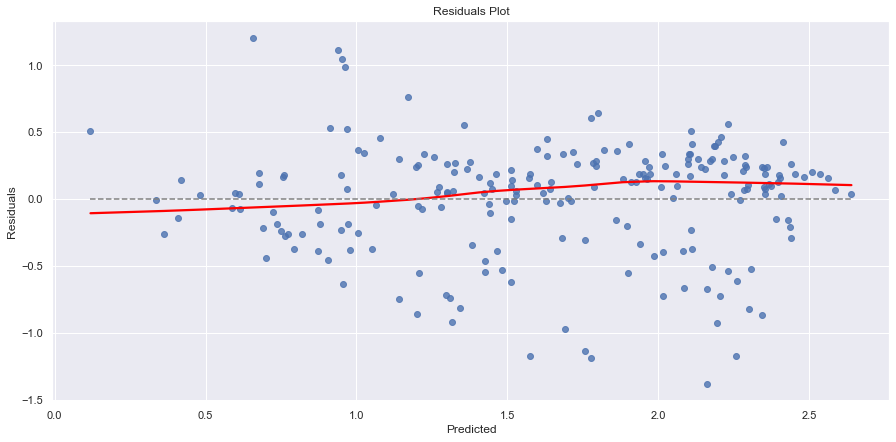

In [66]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(y_predict, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##### (2-2) Actual and Residuals Plot

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


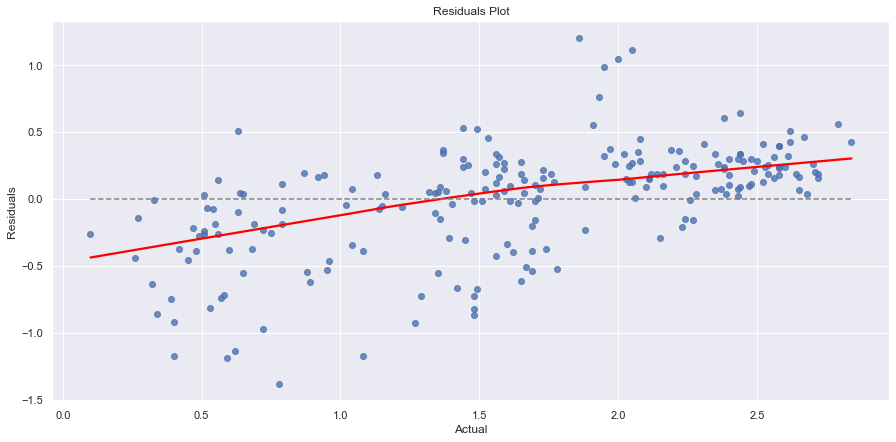

In [67]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(y, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([y.min(), y.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.show()

##### (2-3) Independent variables and Residuals Plot

##### (2-3-1) GHI and Residuals

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


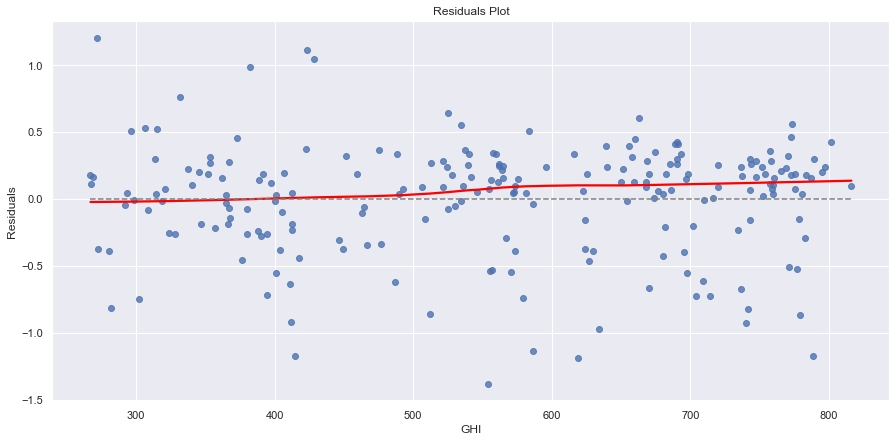

In [68]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(x.ghi, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([x.ghi.min(), x.ghi.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("GHI")
plt.ylabel("Residuals")
plt.show()

##### (2-3-2) Visibility and Residuals Plot

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


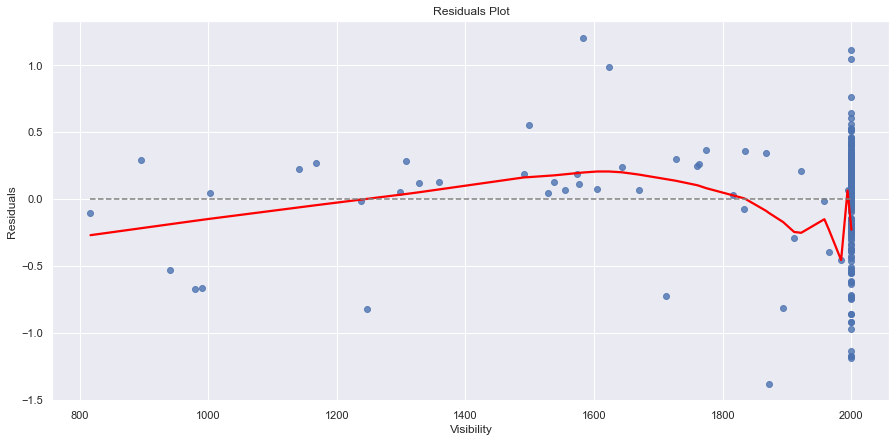

In [69]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(x.visibility, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([x.visibility.min(), x.visibility.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Visibility")
plt.ylabel("Residuals")
plt.show()

##### (2-3-3) Temperature and Residuals Plot

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


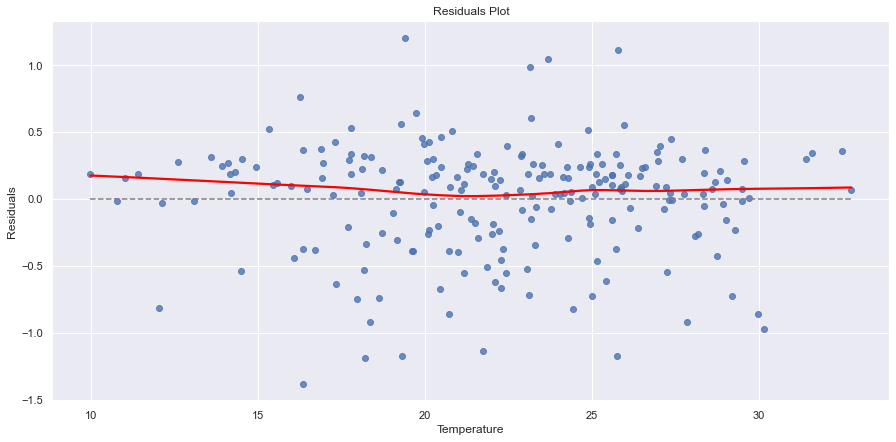

In [70]:
residuals = y - y_predict

sns.set(rc={'figure.figsize':(15, 7)})
sns.regplot(x.temperature, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([x.temperature.min(), x.temperature.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Temperature")
plt.ylabel("Residuals")
plt.show()

##### (2-4) Normality of residuals
- 잔차가 정규분포를 따른다는 가정
- Shapiro Test를 통해 확인할 수 있음.

In [71]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9420143961906433, pvalue=1.2367519275358063e-07)

##### (2-5) Equivariance of residuals
- 회귀모형을 통해 예측된 값이 크던 작던, 모든 값을에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌.
- 빨간색 실선이 수평선을 그리는 것이 이상적임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


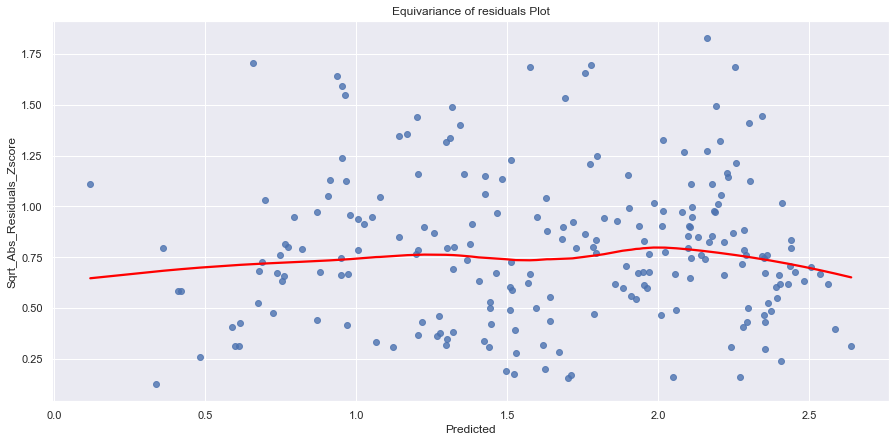

In [72]:
sr = scipy.stats.zscore(residuals)
sns.regplot(y_predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Equivariance of residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Sqrt_Abs_Residuals_Zscore")
plt.show()